Using API url: https://astroarchive.noirlab.edu/api/adv_search/find/?limit=20
https://astroarchive.noirlab.edu/api/retrieve/0abc5ed0b7bba666354415e8a6498275/?hdus=26
Filename: /home/plazas/.astropy/cache/download/url/c0bc6f8bf8d47c08c9bd40902ec4dad5/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     189   ()      
  1  S2            1 CompImageHDU    113   (2046, 4094)   float32   


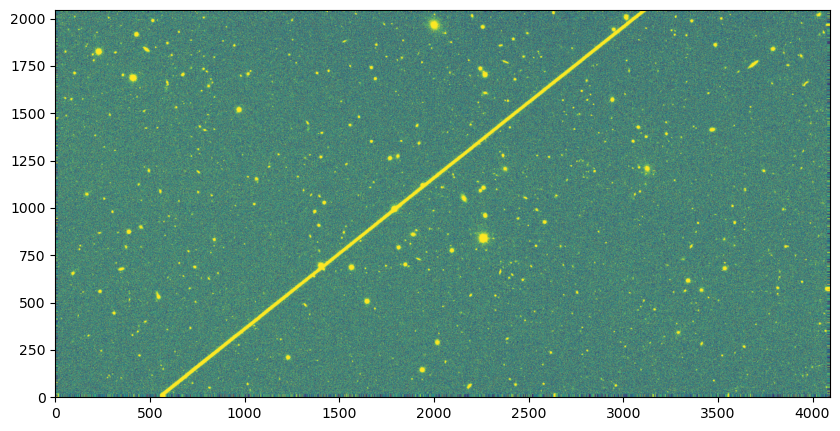

In [2]:
import requests
from astropy.io import fits
from astropy.utils.data import download_file
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


expnum = 1033925


natroot = 'https://astroarchive.noirlab.edu'
adsurl = f'{natroot}/api/adv_search'

jj = {
    "outfields" : [
        "md5sum",
        "archive_filename",
        "dateobs_center",
        "dateobs_min",
        "dateobs_max",
        "proc_type",
        "prod_type",
        "obs_type",
        "release_date",
        "proposal",
        "caldat",
        "EXPNUM",
    ],
    "search" : [
        ["instrument", "decam"],
        ["proc_type", "instcal"],
        ["EXPNUM", 1103448, 1103448],  # requires a range
        ["prod_type", "image"],
    ]
}
apiurl = f'{adsurl}/find/?limit=20'
print(f'Using API url: {apiurl}')
data = requests.post(apiurl,json=jj).json()
query_result = pd.DataFrame(data[1:])  # there should be just 1 row
md5sum = query_result['md5sum'][0]
detector = 26  # set this manually by looking at the DECam detector map
access_url = f'{natroot}/api/retrieve/{md5sum}/?hdus={detector}'
print(access_url)
filename = download_file(access_url, cache=True)
hdu_list = fits.open(filename)
hdu_list.info()
header = hdu_list[0].header
image = hdu_list[1].data

fig = plt.figure(figsize=(10,10))
plt.imshow(np.flip(image.T), origin='lower', vmin = np.percentile(image,5), vmax = np.percentile(image, 95))

In [5]:
header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    0 / Number of axes                                 
EXTEND  =                    T / File may contain extensions                    
DATE    = '2022-06-09T10:44:56' / Date FITS file was generated                  
IRAF-TLM= '2022-06-09T10:45:00' / Time of last modification                     
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT MODIFIED:DATE,DATE-OBS,DTACQNAM,DTCALDAT,DTINSTRU,DTNSANAM,DTPI,DTPROPID
COMMENT ,DTSITE,DTTELESC,INSTRUME,OBSERVAT,OBSID,OBSTYPE,ODATEOBS,PROCTYPE,PRODT
COMMENT YPE,PROPID,SIMPLE,TELESCOP,TIME-OBS                                     
OBJECT  = '296.F.a '        

In [7]:
header_image = hdu_list[1].header

In [9]:
header_image

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 2046 / Axis length                                    
NAXIS2  =                 4094 / Axis length                                    
PCOUNT  =                    0 / No 'random' parameters                         
GCOUNT  =                    1 / Only one group                                 
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
EXTNAME = 'S2      '           / Extension name                                 
INHERIT =                    T / Inherits global header                         
DATE    = '2022-06-09T10:45:03' / Date FITS file was generated                  
IRAF-TLM= '2022-06-09T10:45:43' / Time of last modification                     
WCSAXES =                   